In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Load the dataset
url = r"C:\Users\suyas\OneDrive\Documents\Desktop\task 3\bank+marketing_(1)[1]\bank-additional\bank-additional\bank-additional-full.csv"
data = pd.read_csv(url, sep=';')

# Display the first few rows to understand the dataset structure
print("Dataset Preview:")
print(data.head())

# Check for missing values
print("\nMissing Values in Dataset:")
print(data.isnull().sum())

# Encode categorical variables using LabelEncoder
encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column] = encoder.fit_transform(data[column])

Dataset Preview:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  eurib

In [5]:
# Split the dataset into features (X) and target (y)
X = data.drop('y', axis=1)
y = data['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Build the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

In [6]:
# Evaluate the model
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.9147042162337137

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.65      0.53      0.58      1392

    accuracy                           0.91     12357
   macro avg       0.80      0.74      0.77     12357
weighted avg       0.91      0.91      0.91     12357



In [7]:
# Generate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)



Confusion Matrix:
 [[10572   393]
 [  661   731]]


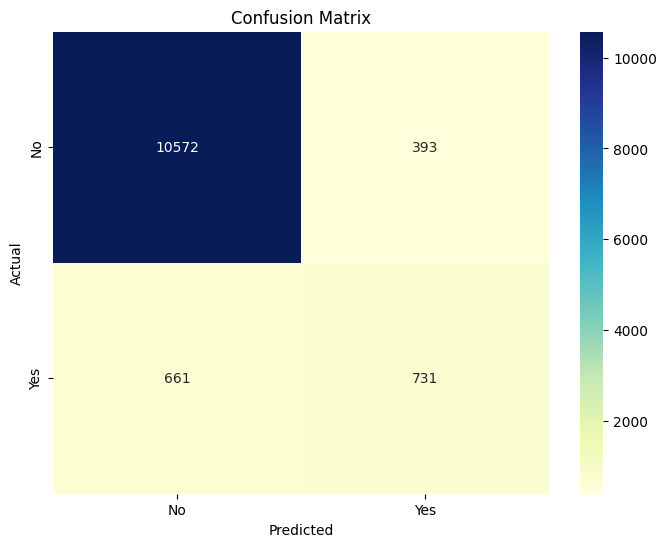

In [8]:
# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

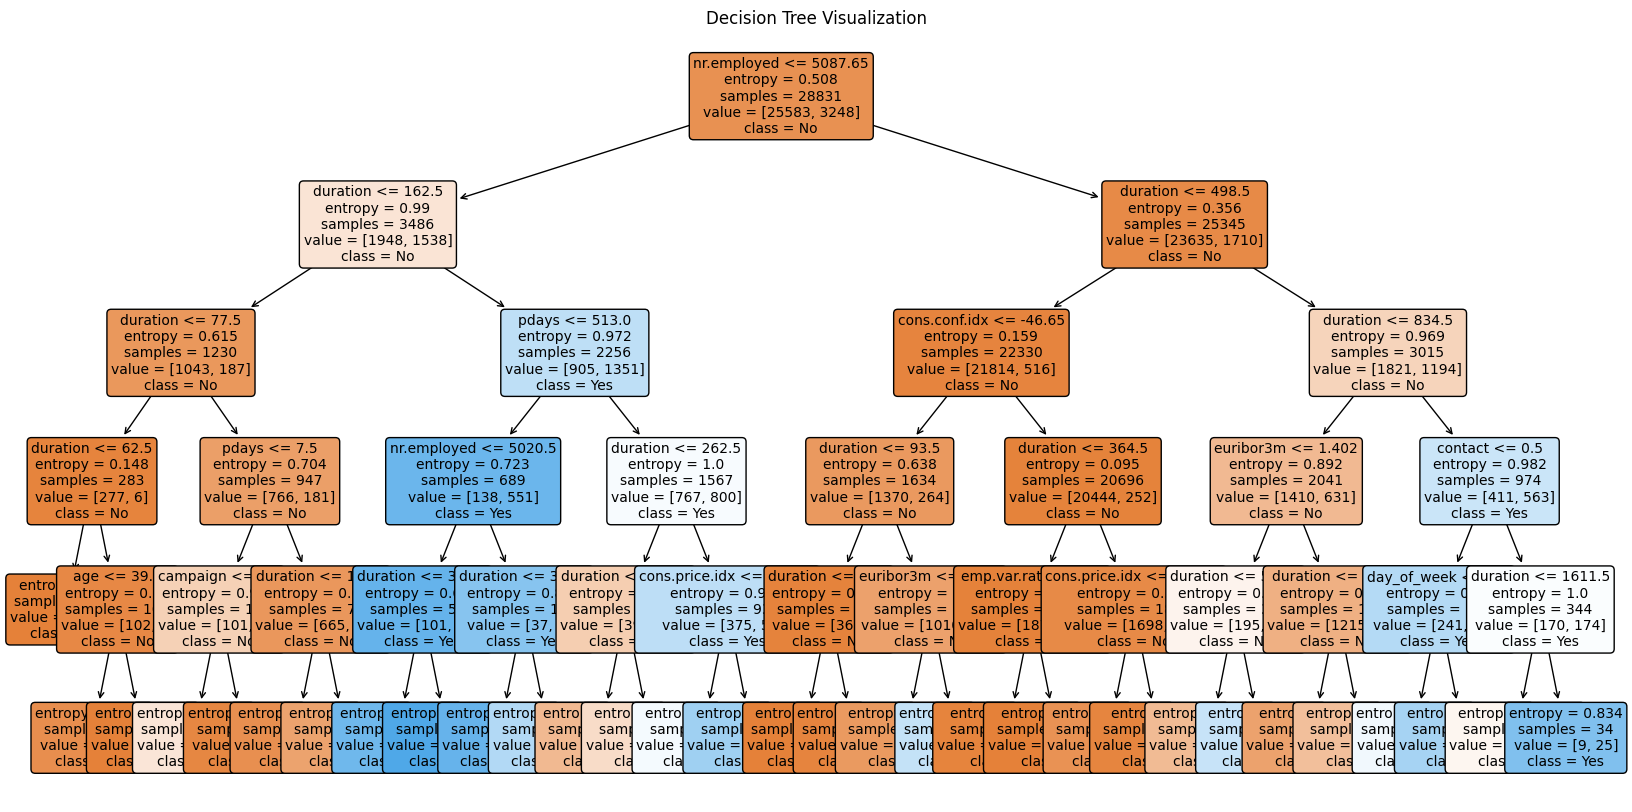

In [9]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

In [10]:
# Print the rules of the decision tree
tree_rules = export_text(clf, feature_names=list(X.columns))
print("\nDecision Tree Rules:\n")
print(tree_rules)


Decision Tree Rules:

|--- nr.employed <= 5087.65
|   |--- duration <= 162.50
|   |   |--- duration <= 77.50
|   |   |   |--- duration <= 62.50
|   |   |   |   |--- class: 0
|   |   |   |--- duration >  62.50
|   |   |   |   |--- age <= 39.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  39.50
|   |   |   |   |   |--- class: 0
|   |   |--- duration >  77.50
|   |   |   |--- pdays <= 7.50
|   |   |   |   |--- campaign <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- campaign >  2.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- pdays >  7.50
|   |   |   |   |--- duration <= 124.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- duration >  124.50
|   |   |   |   |   |--- class: 0
|   |--- duration >  162.50
|   |   |--- pdays <= 513.00
|   |   |   |--- nr.employed <= 5020.50
|   |   |   |   |--- duration <= 387.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- duration >  387.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- nr.empl